# Plot examples

The `utils.plot_utils` module is a major plotting utility built on top of `matplotlib`, designed to facilitate complex plots/sub-plots in a single function call. Most of `matplotlib.pyplot` functions (e.g., `set_title`, `set_xlabel`, ...) are automatically applied based on specific `kwargs` (e.g., `title -> set_title`, `xlabel -> set_xlabel`).

In addition to the `plot` method, custom functions are proposed that add some default configuration / operations to plot special data , such as audios, spectrograms, embeddings, etc.

The below examples show different use cases for the available functions !

## Simple plots

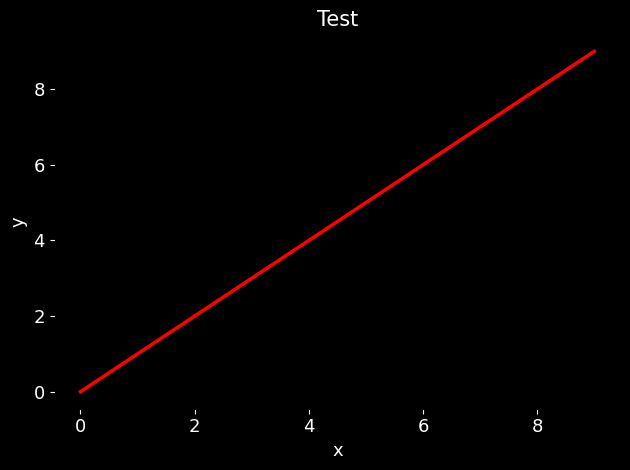

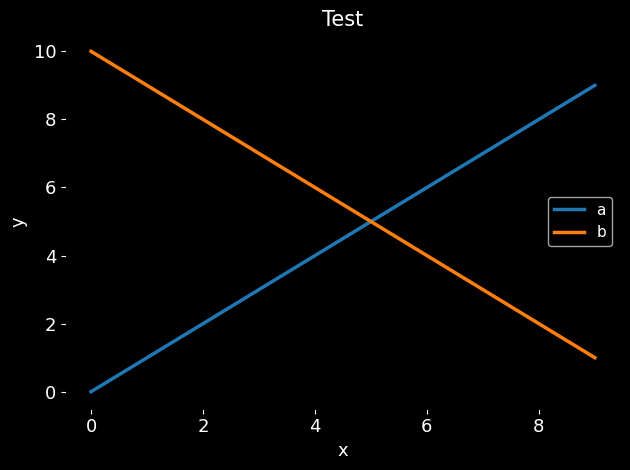

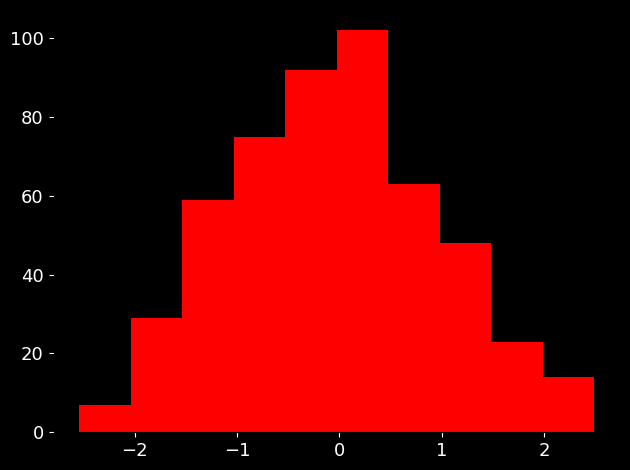

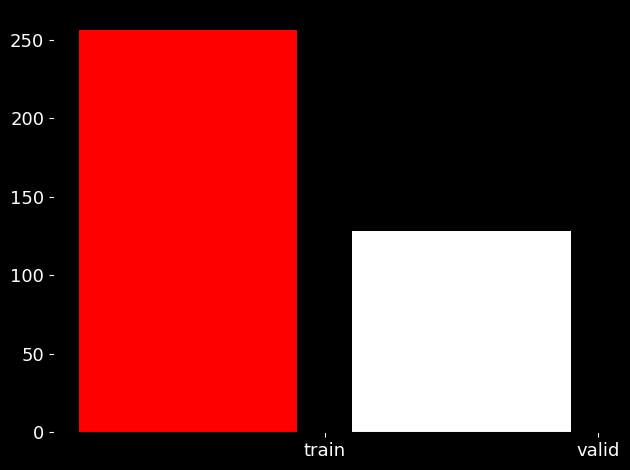

In [1]:
import numpy as np

from utils.plot_utils import *

plot(np.arange(10), title = 'Test', xlabel = 'x', ylabel = 'y')
plot({'a' : np.arange(10), 'b' : range(10, 0, -1)}, title = 'Test', xlabel = 'x', ylabel = 'y')
plot(np.random.normal(size = (512, )), plot_type = 'hist')
plot({'train' : 256, 'valid' : 128}, plot_type = 'bar', color = ['r', 'w'])

## Groupped plots

The `bar`, `box`, and `violin` plots have been customized to enable automatic color/legend, as well as groupped plots ! This is a major convenience for models comparison for example.

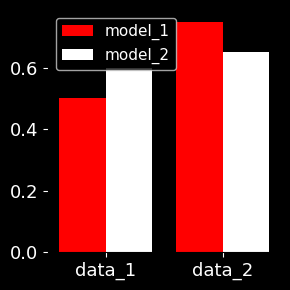

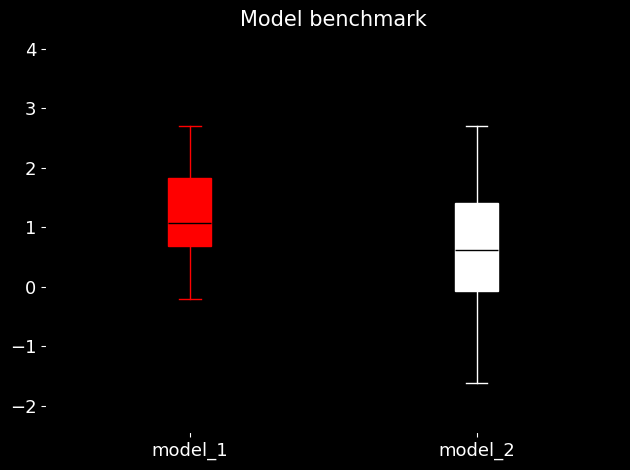

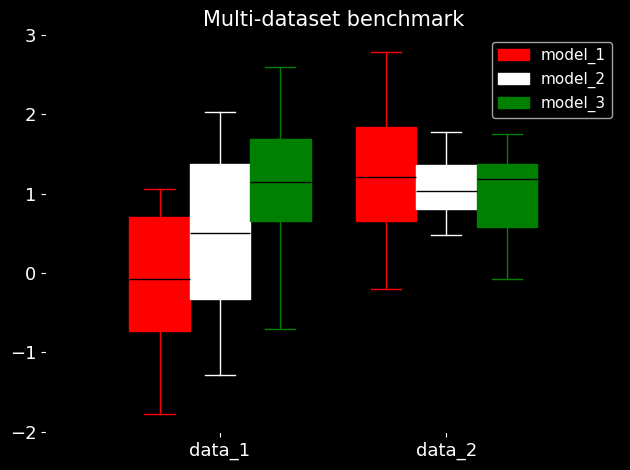

In [3]:
plot(
    {'data_1' : {'model_1' : 0.5, 'model_2' : 0.6}, 'data_2' : {'model_1' : 0.75, 'model_2' : 0.65}},
    plot_type = 'bar', color = ['r', 'w'], figsize = (3, 3)
)

plot({
    'model_1' : np.random.normal(1, size = (64, )),
    'model_2' : np.random.normal(0.5, size = (64, )),
}, title = 'Model benchmark', plot_type = 'boxplot', color = ['r', 'w'])

plot({
    'data_1' : {
        'model_1' : np.random.normal(0.25, size = (8, )),
        'model_2' : np.random.normal(1, size = (8, )),
        'model_3' : np.random.normal(0.5, size = (8, ))
    },
    'data_2' : {
        'model_1' : np.random.normal(.75, size = (8, )),
        'model_2' : np.random.normal(0.8, size = (8, )),
        'model_3' : np.random.normal(0.9, size = (8, ))
    },
}, title = 'Multi-dataset benchmark', plot_type = 'boxplot', color = ['r', 'w', 'g'])

## Custom plots

### Audio plots

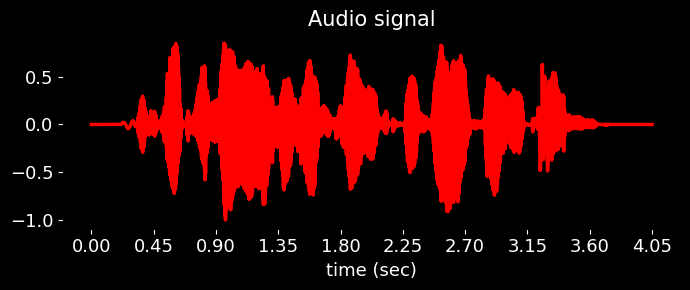

In [4]:
from utils.audio import read_audio

rate, audio = read_audio('tests/data/audio_test.wav')

plot_audio(audio, rate, figsize = (7, 3))

### Image plots

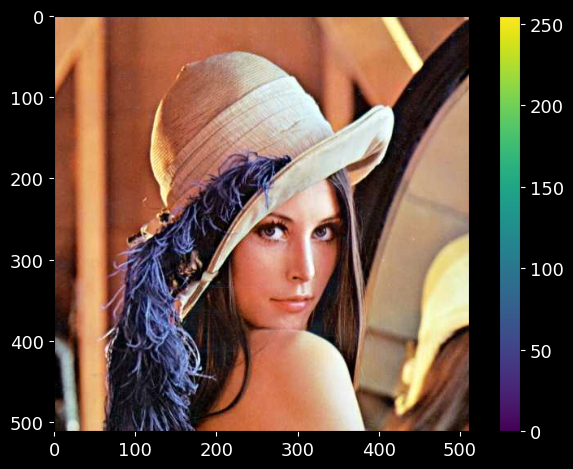

In [16]:
from utils.image import load_image

plot(load_image('tests/data/lena.jpg'))

### Spectrogram plots

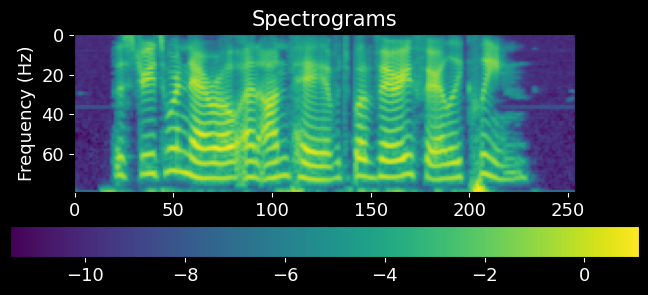

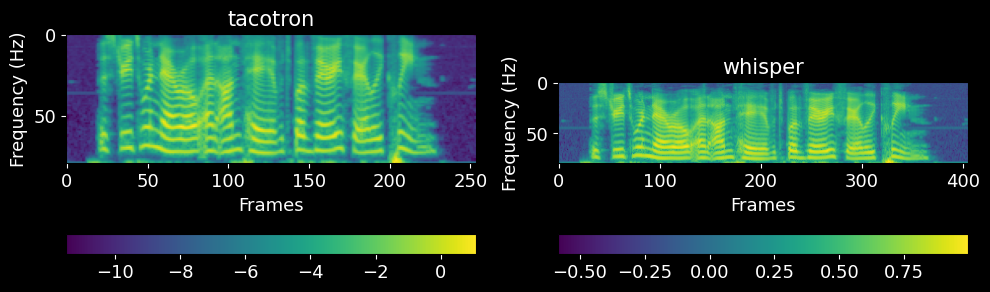

In [7]:
from utils.audio import TacotronSTFT, WhisperSTFT, read_audio

mel_fn = TacotronSTFT()

rate, audio = read_audio('tests/data/audio_test.wav', rate = 22050)

plot_spectrogram(mel_fn(audio), figsize = (7, 3))
plot_spectrogram(
    tacotron = mel_fn(audio), whisper = WhisperSTFT()(audio)
)

### Matrix plots

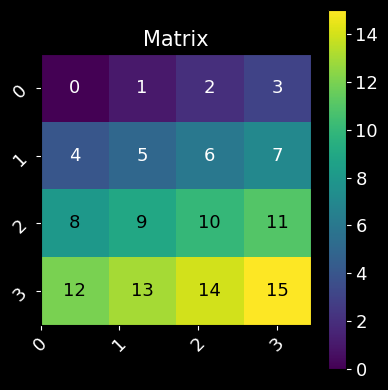

In [9]:
matrix = np.arange(16).reshape(4, 4)
plot_matrix(matrix)

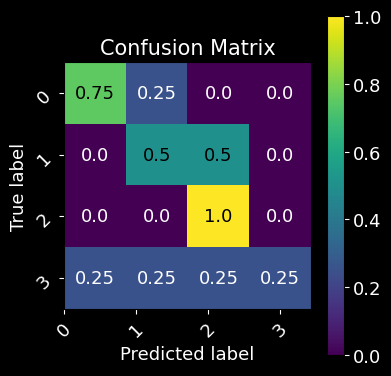

In [10]:
true = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
pred = [0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 2, 0]

plot_confusion_matrix(true = true, pred = pred, norm = True)

### Embedding plots

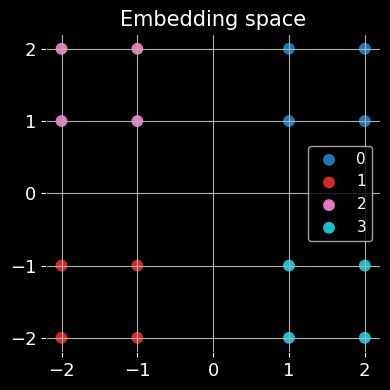

In [11]:
x = np.array([
    [1., 1.], [2., 2.], [2., 1.], [1., 2.],
    [-1., -1.], [-2., -2.], [-2., -1.], [-1., -2.],
    [-1., 1.], [-2., 2.], [-2., 1.], [-1., 2.],
    [1., -1.], [2., -2.], [2., -1.], [1., -2.]
], 'float32')
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3], 'int32')

plot_embedding(x, y)

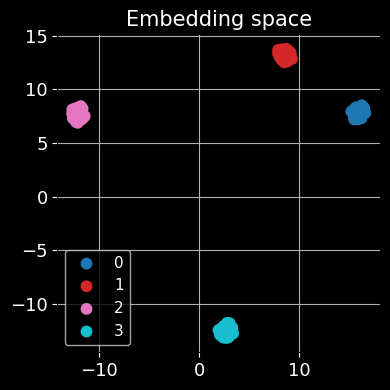

In [12]:
from sklearn.datasets import make_blobs, make_moons

x, y = make_blobs(n_features = 64, n_samples = 128, centers = 4)

plot_embedding(x, ids = y)

## Multiple plots

The `plot_multiple` function offers a conveniant way to create subplots ! All `kwargs` representing data are plotted on different sub plots (if `use_subplots = True` or if the plot type requires sub plots). Each sub-plot can be a custom plot function shown above (like `plot_matrix`) by passing `plot_type = 'matrix'`. Additionally, each data can have a different `plot_type` if specified in the data `dict`

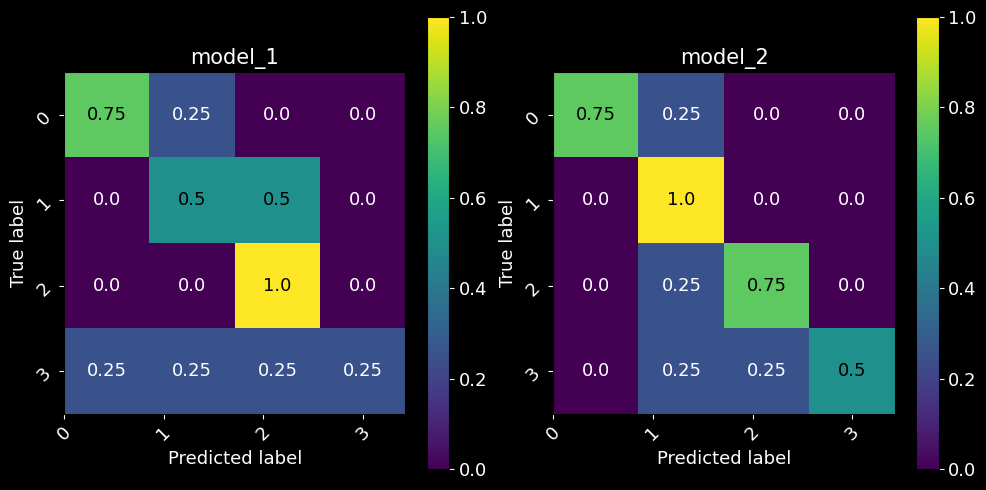

In [13]:
true = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
pred_1 = [0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 2, 0]
pred_2 = [0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3]

plot_multiple(
    model_1 = {'true' : true, 'pred' : pred_1, 'norm' : True},
    model_2 = {'true' : true, 'pred' : pred_2, 'norm' : True},
    plot_type = 'cm'
)

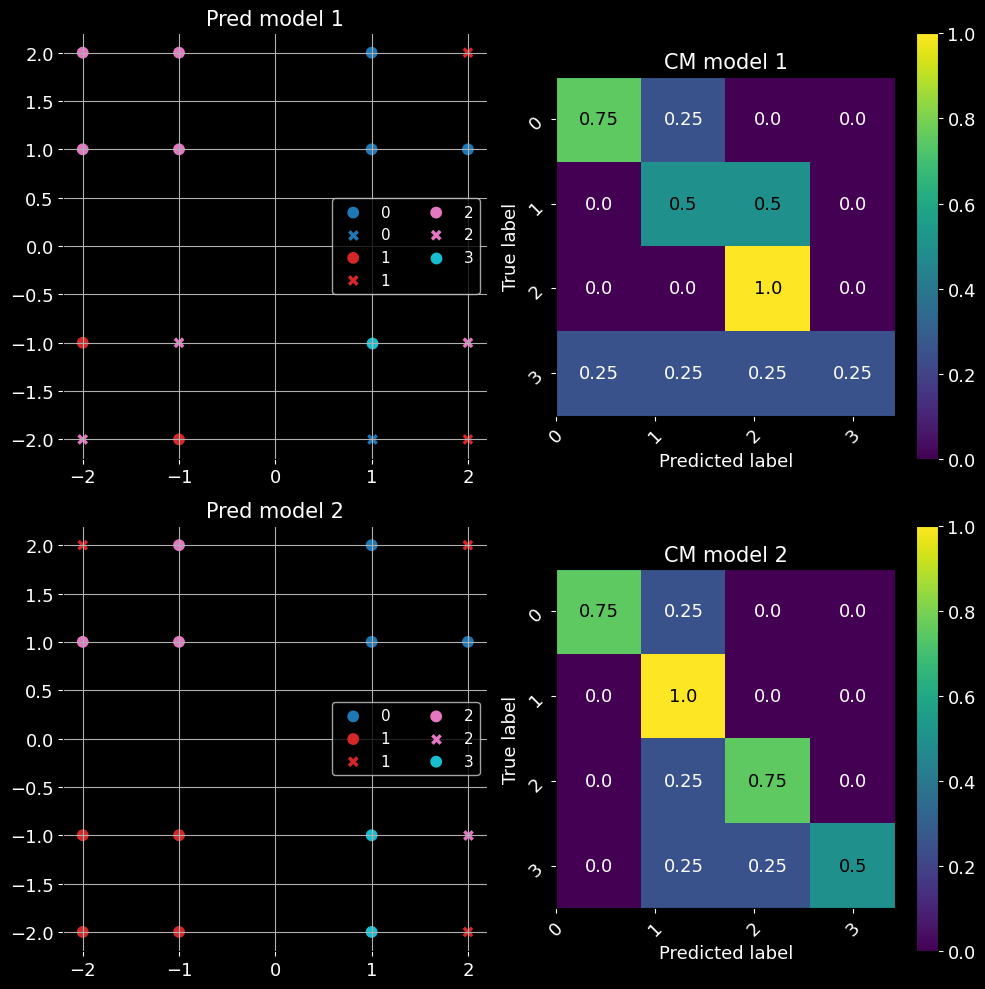

In [14]:
x = np.array([
    [1., 1.], [2., 2.], [2., 1.], [1., 2.],
    [-1., -1.], [-2., -2.], [-2., -1.], [-1., -2.],
    [-1., 1.], [-2., 2.], [-2., 1.], [-1., 2.],
    [1., -1.], [2., -2.], [2., -1.], [1., -2.]
], 'float32')
true = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]

pred_1 = [0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 2, 0]
pred_2 = [0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 3]

marker_1 = ['o' if p == t else 'x' for t, p in zip(true, pred_1)]
marker_2 = ['o' if p == t else 'x' for t, p in zip(true, pred_2)]

plot_multiple(** {
    'Pred model 1' : {'x' : x, 'ids' : pred_1, 'marker' : marker_1, 'plot_type' : 'embedding'},
    'CM model 1'   : {'true' : true, 'pred' : pred_1, 'norm' : True, 'plot_type' : 'cm'},
    'Pred model 2' : {'x' : x, 'ids' : pred_2, 'marker' : marker_2, 'plot_type' : 'embedding'},
    'CM model 2'   : {'true' : true, 'pred' : pred_2, 'norm' : True, 'plot_type' : 'cm'},
})

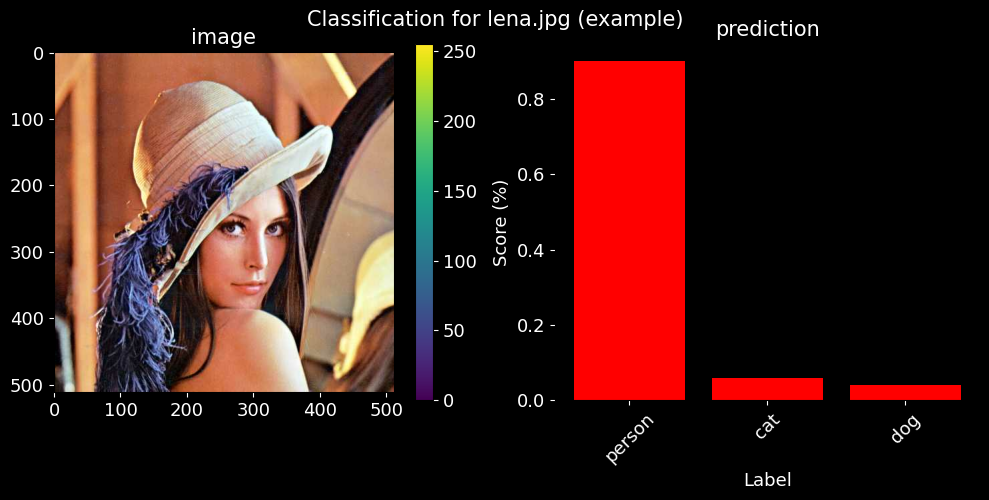

In [15]:
from utils.image import load_image

plot_multiple(
    image = load_image('example_data/images/lena.jpg'),
    prediction = {'scores' : np.array([0.9, 0.06, 0.04]), 'labels' : ['person', 'cat', 'dog'], 'plot_type' : 'classification'},
    title = 'Classification for lena.jpg (example)'
)